<a href="https://colab.research.google.com/github/Jasn001/COMP_215/blob/main/labs/lab03-classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 3
----------------
#### Name(s): Jasnpreet Singh
#### Date: 01/22/25

By the end of this lab you should be able to:
  * use a `class` to organize related data and functions
  * identify a `record` as a related collection of data, with fields for each data value

During this lab, you will be introduced to the following:
  * the `@dataclass` decorator to simplify class definition for classes that primarily encapsulate a data structure.
  * the `@classmethod` decorator to create 'object factories'.
  * plotting frequency distributions in `matplotlib`



## Near Earth Objects (with classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/.  In this lab we will define an Asteroid class to help us structure the data for easier data analysis.  Here's a brief review from Lab 2 on how to use the API.  

In [49]:
# import necessary modules
import datetime, json, requests
from dataclasses import dataclass
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.  Read these functions carefully to be sure you know what they are returning.  Note the nested for loop structure in the return statement of the `get_neos` function - be sure to understand what it is doing.  You might want to add some more `pprint` statements to be sure you understand the data structures.

In [50]:
API_KEY = 'jWfSK7Dg7qoR5G2CFq8sMs9n3lNTxPcFtS8Eh9bo'  # substitute your API key here

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    # Fetch last week's NEO feed
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

week_start = '2023-01-15'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
pprint(neo)

117 Near Earth Objects found for week of 2023-01-15
{'absolute_magnitude_h': 24.86,
 'close_approach_data': [{'close_approach_date': '1949-07-04',
                          'close_approach_date_full': '1949-Jul-04 22:19',
                          'epoch_date_close_approach': -646710060000,
                          'miss_distance': {'astronomical': '0.419726307',
                                            'kilometers': '62790161.51016609',
                                            'lunar': '163.273533423',
                                            'miles': '39015997.166588442'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '73509.6739172087',
                                                'kilometers_per_second': '20.4193538659',
                                                'miles_per_hour': '45676.0526626122'}},
                         {'close_approach_date': '1950-08-07',
                        

## Exercise 1:  Define an Asteroid class

Define a simple Asteroid class with some basic state variables for a single NEO.  Your Asteroid class should define at least 4 "state variables:”

    id
    name
    estimated_diameter (m)
    is_potentially_hazardous (bool)

Operations must include:
* `__init__(self, ...)` method to initialize a new Asteroid object with specific data values
* `__str__(self)`, and `__repr__(self)` methods that return nicely formatted string representations of the object.

Write a little code to test your new class.

In [51]:
class Asteroid:
    def __init__(self, id, name, estimated_diameter, is_potentially_hazardous):
        self.id = id
        self.name = name
        self.estimated_diameter = estimated_diameter
        self.is_potentially_hazardous = is_potentially_hazardous

    def __str__(self):
        hazardous_status = "Yes" if self.is_potentially_hazardous else "No"
        return f"Asteroid {self.name} (ID: {self.id}) - Diameter: {self.estimated_diameter} meters, Hazardous: {hazardous_status}"

    def __repr__(self):
        return f"Asteroid(id={self.id}, name={self.name}, estimated_diameter={self.estimated_diameter}, is_potentially_hazardous={self.is_potentially_hazardous})"

# Creating an Asteroid object
asteroid_1 = Asteroid(
    id="2025-01-22_12345",
    name="Asteroid X",
    estimated_diameter=750.0,
    is_potentially_hazardous=True
)

# Printing the object using __str__()
print(str(asteroid_1))  # User-friendly string representation

# Printing the object using __repr__()
print(repr(asteroid_1))  # Detailed string representation for debugging


Asteroid Asteroid X (ID: 2025-01-22_12345) - Diameter: 750.0 meters, Hazardous: Yes
Asteroid(id=2025-01-22_12345, name=Asteroid X, estimated_diameter=750.0, is_potentially_hazardous=True)


## Exercise 2: Make a histogram

Create a list of all the Asteroid objects from this week's NEO feed and use the list to create a histogram to visualize the distribution of Asteroid diameters.  To create the historgram use the `hist()` method in the `matplotlib.pyplot` module.

In [52]:
# Define the start date for this week
week_start = datetime.datetime.now().strftime('%Y-%m-%d')

# Fetch NEOs for this week and create a list of Asteroid objects
neos = get_neos(week_start)

# Create a list of diameters from the Asteroid objects
diameters = [asteroid.estimated_diameter for asteroid in neos]

# Plot the histogram of asteroid diameters
plt.figure(figsize=(10, 6))
plt.hist(diameters, bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Asteroid Diameters (This Week)')
plt.xlabel('Estimated Diameter (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


83 Near Earth Objects found for week of 2025-01-22


AttributeError: 'dict' object has no attribute 'estimated_diameter'

## Exercise 3: Use `@dataclass` and `@classmethod` to do the same thing

Now that you know how to define a simple class, we are going to use a use decorators to simplify (ie. shorten) our class definitions.  You will redefine the Asteroid class in this exercise.  Note that having two different definitions of a class in a single piece of code is very bad practice. I am asking you to do it here just so that you can see the differt ways to define classes.

 1. Use the `@dataclass` decorator from the `dataclasses` module to define the Asteroid class.  The `@dataclass` decorator will automatically generate some of the commonly used methods, like `__init()__`, `__repr()__`, and `__eq()__`.  The definition should start like this:
    ```
    @dataclass
    class Asteroid:
      ...
    ```
Write a little code to test your new class.
  

 2. Use the `@classmethod` decorator to construct a `from_NEO()` 'factory method' inside your Asteroid class that creates Asteroid objects from the NEO API.  The method should take the id for a single NEO, fetche the NEO record from API, constructs a single Asteroid object, and return the Asteroid object representing that NEO.  This kind of method is called a “Factory” because it constructs an object from raw materials.  The object factory method should start like this:
    ```
    @classmethod
    from_NEO(cls, neo_id):
        ...
    ```
Write a little code to test your new method.

 3. Use your new Asteroid class to create a list of Asteroid objects.  Use this list to create the same historgram as in Exercise 2.  




83 Near Earth Objects found for week of 2025-01-22


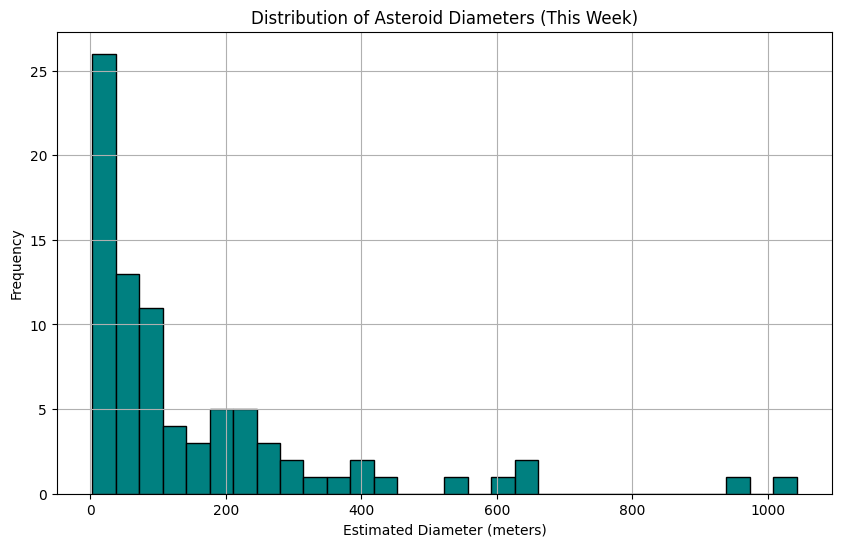

In [53]:
@dataclass
class Asteroid:
    id: str
    name: str
    estimated_diameter: float
    is_potentially_hazardous: bool

    @classmethod
    def from_NEO(cls, neo_id):
        """ Factory method to create an Asteroid object from the NEO API based on the given ID """
        url = f'https://api.nasa.gov/neo/rest/v1/neo/{neo_id}?api_key={API_KEY}'
        response = requests.get(url)

        # Handle potential errors in the response
        if response.status_code != 200:
            print(f"Error fetching NEO data: {response.status_code}")
            return None

        data = response.json()

        # Extract relevant fields
        name = data['name']
        estimated_diameter = data['estimated_diameter']['meters']['estimated_diameter_max']
        is_potentially_hazardous = data.get('is_potentially_hazardous_asteroid', False)

        # Create and return the Asteroid object
        return cls(id=neo_id, name=name, estimated_diameter=estimated_diameter, is_potentially_hazardous=is_potentially_hazardous)

def get_neos(start_date):
    """ Fetch NEO data for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    response = requests.get(url)
    data = response.json()

    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')

    # Extract NEO IDs and create Asteroid objects using from_NEO()
    asteroids = []
    for dated_records in data['near_earth_objects'].values():
        for neo in dated_records:
            asteroid = Asteroid.from_NEO(neo['id'])
            if asteroid:  # Only append if the object is valid
                asteroids.append(asteroid)

    return asteroids

# Define the start date for this week
week_start = datetime.datetime.now().strftime('%Y-%m-%d')

# Fetch NEOs for this week and create a list of Asteroid objects
neos = get_neos(week_start)

# Create a list of diameters from the Asteroid objects
diameters = [asteroid.estimated_diameter for asteroid in neos]

# Plot the histogram of asteroid diameters
plt.figure(figsize=(10, 6))
plt.hist(diameters, bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Asteroid Diameters (This Week)')
plt.xlabel('Estimated Diameter (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Challenge Exercise:

One of your esteemed astromoner collegues has a theory that there is a correlation between the diameter and the orbital period of an asteroid.  Add the `orbital_period` data from the NEO API to your Asteroid class definition and use it to plot the orbital period (in years) versus the estimated diameter (in m) of all the asteroids from this week's NEO record.  Do you see a correlation?

83 Near Earth Objects found for week of 2025-01-22


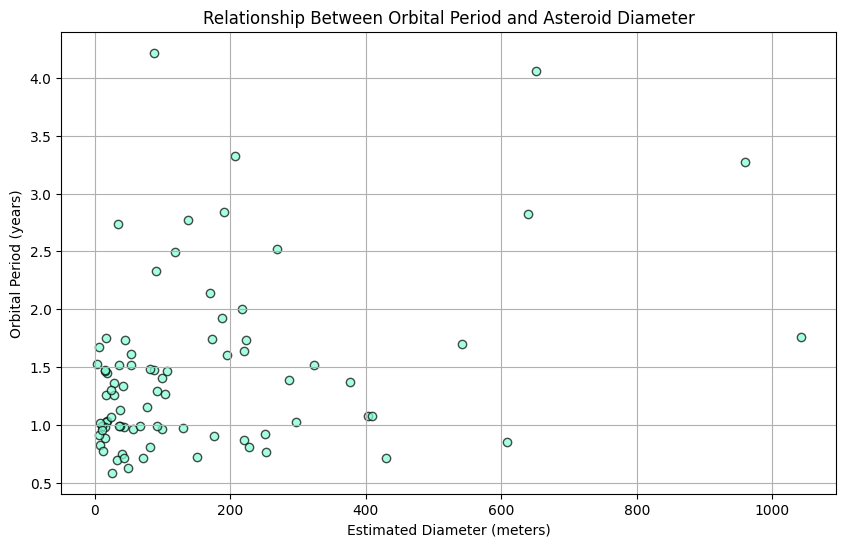

In [55]:
@dataclass
class Asteroid:
    id: str
    name: str
    estimated_diameter: float
    orbital_period: float  # Orbital period in years
    is_potentially_hazardous: bool

    @classmethod
    def from_NEO(cls, neo_id):
        """ Factory method to create an Asteroid object from the NEO API based on the given ID """
        url = f'https://api.nasa.gov/neo/rest/v1/neo/{neo_id}?api_key={API_KEY}'
        response = requests.get(url)

        # Handle potential errors in the response
        if response.status_code != 200:
            print(f"Error fetching NEO data: {response.status_code}")
            return None

        data = response.json()

        # Extract relevant fields
        name = data['name']
        estimated_diameter = data['estimated_diameter']['meters']['estimated_diameter_max']

        # Check if orbital period data is available
        orbital_period_days = None
        if 'orbital_data' in data and 'orbital_period' in data['orbital_data']:
            orbital_period_days = data['orbital_data']['orbital_period']  # Orbital period in days

        # Convert orbital period to years if available, otherwise set to None
        orbital_period_years = None
        if orbital_period_days:
            try:
                # Ensure orbital_period_days is a valid number (string might be passed)
                orbital_period_days = float(orbital_period_days)  # Convert string to float if needed
                orbital_period_years = orbital_period_days / 365  # Convert days to years
            except ValueError:
                orbital_period_years = None  # In case of invalid data

        is_potentially_hazardous = data.get('is_potentially_hazardous_asteroid', False)

        # Create and return the Asteroid object
        return cls(id=neo_id, name=name, estimated_diameter=estimated_diameter, orbital_period=orbital_period_years, is_potentially_hazardous=is_potentially_hazardous)

def get_neos(start_date):
    """ Fetch NEO data for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    response = requests.get(url)
    data = response.json()

    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')

    # Extract NEO IDs and create Asteroid objects using from_NEO()
    asteroids = []
    for dated_records in data['near_earth_objects'].values():
        for neo in dated_records:
            asteroid = Asteroid.from_NEO(neo['id'])
            if asteroid:  # Only append if the object is valid
                asteroids.append(asteroid)

    return asteroids

# Define the start date for this week
week_start = datetime.datetime.now().strftime('%Y-%m-%d')

# Fetch NEOs for this week and create a list of Asteroid objects
neos = get_neos(week_start)

# Create lists for diameters and orbital periods (excluding None values for orbital_period)
diameters = [asteroid.estimated_diameter for asteroid in neos]
orbital_periods = [asteroid.orbital_period for asteroid in neos if asteroid.orbital_period is not None]

# Plot the relationship between orbital period and diameter
plt.figure(figsize=(10, 6))
plt.scatter(diameters, orbital_periods, color='aquamarine', edgecolor='black', alpha=0.7)
plt.title('Relationship Between Orbital Period and Asteroid Diameter')
plt.xlabel('Estimated Diameter (meters)')
plt.ylabel('Orbital Period (years)')
plt.grid(True)
plt.show()
